<a href="https://colab.research.google.com/github/cabarros3/data_analysis/blob/main/skoob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

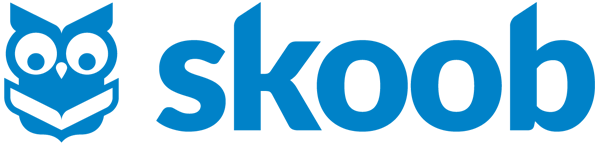
# Data Analysis - SKOOB

1.   **O que é o skoob?**

  Skoob é uma rede social colaborativa brasileira para leitores, lançada em janeiro de 2009 pelo desenvolvedor Lindenberg Moreira. O site tornou-se um ponto de encontro para leitores e novos escritores, que trocam sugestões de leitura e organizam reuniões em livrarias. Seu nome deriva da palavra books, ao contrário

2.   **Como funciona?**

  No Skoob podemos criar nosso status de leitura, adicionar um rating ao livro que estamos lendo ou que já lemos e podemos adicionar resenhar desses livros.


### Sumário do notebook

*   [Data Pre-processing](https://colab.research.google.com/drive/15P1Xod8P5bhVp_0K4LUl9_U8fcONB0FO#scrollTo=-GjchBeR85CH&line=1&uniqifier=1)
  
  * Importando as bibliotecas
  * Importando o arquivo 
  * Visualizando o shape do arquivo
  * Data Cleaning
*   [Data Visualization](https://colab.research.google.com/drive/15P1Xod8P5bhVp_0K4LUl9_U8fcONB0FO#scrollTo=EX0Chj1gCGXl&line=1&uniqifier=1)
 * Number of books in all the different languages
  * Top 10 most rated books
  * Top 10 books with most text reviews
  * Top 10 books with highest average rating
  * Author of most books
  * Average rating distribution of all books
  * Top 10 books with most pages
  * Top 10 highly rated authors


>[LINK do dataset no meu github](https://github.com/cabarros3/testes/blob/main/dados.csv)

>[Link do notebook de inspiração no Kaggle](https://www.kaggle.com/listonlt/books-data-visualisation-with-seaborn/comments)






# Data Pre-processing

In [23]:
import pandas as pd
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [10]:
dados_skoob = pd.read_csv('https://raw.githubusercontent.com/cabarros3/testes/a171f6de911fa819c5bfe354417c46e72519832f/dados.csv?token=ARLEXOIA6AYUPX43DEARRZTAFQF5E')
dados_skoob.head(2)

,titulo,autor,ISBN_13,ISBN_10,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
0,Orçamento sem falhas,Nath Finanças,9.786556e+12,6555601566,2021,128,português,Intrínseca,0.0,0,0,0,0,1,0,0,"Quando o assunto é dinheiro, não dá para achar...","Economia, Finanças / Literatura Brasileira / N...",28,72
1,Minha Sombria Vanessa,Kate Elizabeth Russell,9.788551e+12,8551006274,2020,432,português,Intrínseca,4.3,2,653,48,3,6,389,2,Elogiado por Gillian Flynn e considerado um do...,Drama / Ficção / Literatura Estrangeira / Susp...,7,93


In [28]:
dados_skoob.shape

(11975, 18)

## Data Cleaning

In [11]:
dados_skoob.drop(['ISBN_13','ISBN_10'], axis=1, inplace=True) #dropando dados desnecessários (colunas de isbn13 e isbn10)
dados_skoob.head(2)

,titulo,autor,ano,paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero,male,female
0,Orçamento sem falhas,Nath Finanças,2021,128,português,Intrínseca,0.0,0,0,0,0,1,0,0,"Quando o assunto é dinheiro, não dá para achar...","Economia, Finanças / Literatura Brasileira / N...",28,72
1,Minha Sombria Vanessa,Kate Elizabeth Russell,2020,432,português,Intrínseca,4.3,2,653,48,3,6,389,2,Elogiado por Gillian Flynn e considerado um do...,Drama / Ficção / Literatura Estrangeira / Susp...,7,93


In [13]:
dados_skoob.rename(columns={'paginas':'total_paginas'}, inplace=True) # renomeando a coluna 'pagina' para 'total_paginas'

In [14]:
dados_skoob.rename(columns={'genero':'genero_literario'}, inplace=True) #renomeando a coluna 'genero' para 'genero_literario'
dados_skoob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11975 entries, 0 to 11974
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   titulo            11975 non-null  object 
 1   autor             11971 non-null  object 
 2   ano               11975 non-null  int64  
 3   total_paginas     11975 non-null  int64  
 4   idioma            11973 non-null  object 
 5   editora           11974 non-null  object 
 6   rating            11975 non-null  float64
 7   avaliacao         11975 non-null  int64  
 8   resenha           11975 non-null  int64  
 9   abandonos         11975 non-null  int64  
 10  relendo           11975 non-null  int64  
 11  querem_ler        11975 non-null  int64  
 12  lendo             11975 non-null  int64  
 13  leram             11975 non-null  int64  
 14  descricao         11318 non-null  object 
 15  genero_literario  11386 non-null  object 
 16  male              11975 non-null  int64 

In [22]:
#problema: as classificações estão erradas? se estiver, como arrumar?
dados_skoob['genero_literario'].unique()

array(['Economia, Finanças / Literatura Brasileira / Não-ficção ',
       'Drama / Ficção / Literatura Estrangeira / Suspense e Mistério ',
       'Ficção / Ficção científica / Literatura Estrangeira ', ...,
       'Direito / Educação / Literatura Estrangeira ',
       'Literatura Brasileira / Romance / Ficção / Drama / Infantojuvenil ',
       'Aventura / Cinema / Crime / Crônicas / Drama / Entretenimento / Ficção / História / HQ, comics, mangá / Infantojuvenil / Jovem adulto / Literatura Estrangeira / Religião e Espiritualidade / Romance / Suspense e Mistério '],
      dtype=object)

# Data Visualization

**Let's find the number of books in all the different languages.**

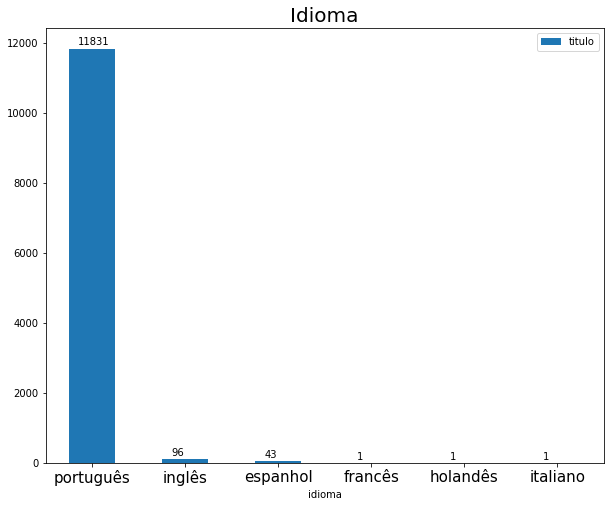

In [29]:
ax = dados_skoob.groupby('idioma')['titulo'].count().reset_index().sort_values('titulo', ascending=False).head(10).set_index('idioma').plot.bar(figsize=(10,8), rot=0)
plt.title('Idioma', fontsize = 20)
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+0.1,p.get_height()+100))

* No shape do df temos a informação de que são (11975 linhas, 18 colunas).
* Quando plotamos o gráfico para saber qual idioma tem mais títulos cadastrados encontramos o idioma português com 11831 títulos.
* Os outros idiomas Inglês e Espanhol tem, respectivamente, 96 e 43 títulos.

**As we see that majority of the books are in Protuguese. So lets only concentrate on portuguese books.**

In [30]:
df = dados_skoob[(dados_skoob.idioma == 'português')] #fazendo um tipo query para encontrar todo os livros com o idioma em pt e colocando isso dentro de uma nova variável
df.head(2)

,titulo,autor,ano,total_paginas,idioma,editora,rating,avaliacao,resenha,abandonos,relendo,querem_ler,lendo,leram,descricao,genero_literario,male,female
0,Orçamento sem falhas,Nath Finanças,2021,128,português,Intrínseca,0.0,0,0,0,0,1,0,0,"Quando o assunto é dinheiro, não dá para achar...","Economia, Finanças / Literatura Brasileira / N...",28,72
1,Minha Sombria Vanessa,Kate Elizabeth Russell,2020,432,português,Intrínseca,4.3,2,653,48,3,6,389,2,Elogiado por Gillian Flynn e considerado um do...,Drama / Ficção / Literatura Estrangeira / Susp...,7,93


**Top 10 most rated books**